© 2019 Suzy Beeler. This work is licensed under a [Creative Commons Attribution License CC-BY 4.0](https://creativecommons.org/licenses/by/4.0/). All code contained herein is licensed under an [MIT license](https://opensource.org/licenses/MIT) 

This exercise was generated from a Jupyter notebook. You can download the notebook [here](stochastic_logistic_growth.ipynb).
___

# Stochastic simulation of logistic growth

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()

In [19]:
# biological parameters
k = 0.02 # per min
N0 = 1
Nstar = 10000

# simulation parameters
dt = 1 # min
Nsteps = 2000

# array to store values
Ns = np.zeros(Nsteps)
Ns[0] = N0

In [20]:
# loop through steps, growing or decaying each time
for i in range(1, Nsteps):
    
    # get what the growth and decay terms are now
    growth_term = k*Ns[i-1]*dt
    decay_term = k*Ns[i-1]**2*dt/Nstar
    growth_prob = growth_term / (growth_term + decay_term)
    
    # coin flip
    rand = np.random.uniform()
    
    # grow or decay accrodingly
    if rand < growth_prob:
        Ns[i] = Ns[i-1] + growth_term
        
    else:
        Ns[i] = Ns[i-1] - decay_term

Text(0, 0.5, 'N')

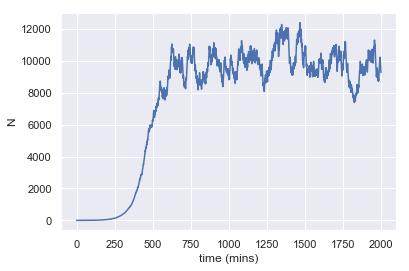

In [21]:
times = np.arange(Nsteps)*dt
plt.plot(times, Ns)
plt.xlabel("time (mins)")
plt.ylabel("N")

# Comparing to deterministic logistic growth

In [22]:
# array to store values
Nd = np.zeros(Nsteps)
Nd[0] = N0

In [23]:
# loop through steps, growing or decaying each time
for i in range(1, Nsteps):
    
    # get what the growth adn decay terms are now
    growth_term = k*Nd[i-1]*dt
    decay_term = k*Nd[i-1]**2*dt/Nstar
    
    Nd[i] = Nd[i-1] + growth_term - decay_term

Text(0, 0.5, 'N')

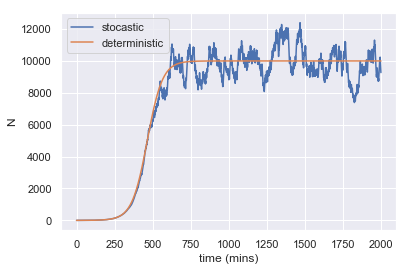

In [24]:
plt.plot(Ns, label="stocastic")
plt.plot(Nd, label="deterministic")
plt.legend()
plt.xlabel("time (mins)")
plt.ylabel("N")